In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,20100104,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,20100105,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,20100106,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,20100107,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,20100108,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


In [3]:
df_sp.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip', 'conm', 'div', 'divd',
       'dvrated', 'divsppaydate', 'curcdd', 'cshoc', 'cshtrd', 'eps', 'prccd',
       'prchd', 'prcld', 'prcod', 'prcstd', 'exchg', 'secstat', 'cik', 'conml',
       'naics', 'sic', 'spcindcd', 'stko'],
      dtype='object')

### Description Columns
- prco = Price Open
- prcc = Price Close
- prch = Price High
- prcl = Price Low

In [4]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [5]:
len(df_sp["conm"].unique())

51

In [6]:
# price trend f closed daily or whole timeframe for american airlines
df_aag = df_sp[df_sp["conm"]=="AMERICAN AIRLINES GROUP INC"]
df_aag=df_aag[df_aag["tic"]=="AAL"]
df_aag

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
1496,1045,4,2013-12-09,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,43167060.0,NaN,24.60,25.44,23.4501,23.95,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1497,1045,4,2013-12-10,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,18648140.0,NaN,24.88,25.17,24.4100,24.54,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1498,1045,4,2013-12-11,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,38584270.0,NaN,25.99,27.20,25.3700,25.44,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1499,1045,4,2013-12-12,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,19977100.0,1.28,25.45,26.71,25.4500,26.20,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1500,1045,4,2013-12-13,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,12189890.0,1.28,26.23,26.30,25.5201,25.61,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,1045,4,2021-11-29,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,42706490.0,-5.25,17.74,18.26,17.4200,18.15,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3504,1045,4,2021-11-30,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,49651400.0,-5.25,17.69,17.74,16.9200,17.44,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3505,1045,4,2021-12-01,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,81917470.0,-5.25,16.28,18.24,16.2600,17.94,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3506,1045,4,2021-12-02,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,58399490.0,-5.25,17.42,17.44,16.1500,16.49,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0


In [7]:
df_aag["tic"].unique()

array(['AAL'], dtype=object)

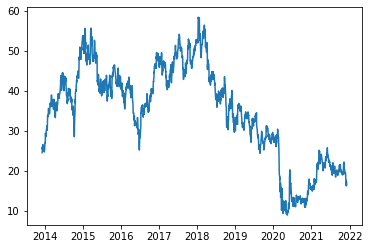

In [8]:
plt.plot(df_aag["datadate"], df_aag["prccd"])
plt.show()

In [9]:
df_aag["prccd"].isnull().values.any()

False

# Simple Moving Average

In [10]:
df_aag["moving_average_200"] = df_aag[["prccd"]].rolling(window=200).mean()
df_aag["moving_average_90"] = df_aag[["prccd"]].rolling(window=90).mean()
df_aag["moving_average_30"] = df_aag[["prccd"]].rolling(window=30).mean()
df_aag["moving_average_14"] = df_aag[["prccd"]].rolling(window=14).mean()
df_aag["moving_average_7"] = df_aag[["prccd"]].rolling(window=7).mean()

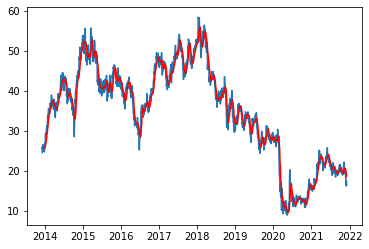

In [11]:
plt.plot(df_aag["datadate"], df_aag["prccd"])
# plt.plot(df_aag["datadate"], df_aag["moving_average_200"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_90"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_30"], color="red")
plt.plot(df_aag["datadate"], df_aag["moving_average_14"], color="red")
# plt.plot(df_aag["datadate"], df_aag["moving_average_7"], color="red")
plt.show()

In [12]:
df_buy_signal = df_aag[["datadate", "prccd", "moving_average_200"]].dropna().reset_index()

In [13]:
df_buy_signal.index

RangeIndex(start=0, stop=1813, step=1)

In [14]:
df_buy_signal

,index,datadate,prccd,moving_average_200
0,1695,2014-09-24,36.12,36.611298
1,1696,2014-09-25,35.21,36.664348
2,1697,2014-09-26,35.93,36.719598
3,1698,2014-09-29,35.03,36.764798
4,1699,2014-09-30,35.48,36.814948
...,...,...,...,...
1808,3503,2021-11-29,17.74,21.236400
1809,3504,2021-11-30,17.69,21.235750
1810,3505,2021-12-01,16.28,21.227200
1811,3506,2021-12-02,17.42,21.225750


In [15]:
print(df_buy_signal.iloc[1702]["prccd"])

21.08


In [16]:
df_buy_signal.iloc[1702]["prccd"] > df_buy_signal.iloc[1702]["moving_average_200"]

True

In [17]:
df_buy_signal.index

RangeIndex(start=0, stop=1813, step=1)

In [18]:
# determine all buy signals

list = []

for i in df_buy_signal.index:
    
    if i-1 in df_buy_signal.index:
        
        # Signal, when the price crosses the sma from below, i.e. the price was below the sma the day before and is now above the sma
        
        if ((df_buy_signal.iloc[i]["prccd"] > df_buy_signal.iloc[i]["moving_average_200"]) & (df_buy_signal.iloc[i-1]["prccd"] < df_buy_signal.iloc[i]["moving_average_200"])):
            
            list.append(df_buy_signal.iloc[i]["prccd"])
            
        else:
            
            list.append(None)

list.append(None)

In [19]:
df_buy_signal["signal"] = list

In [20]:
len(df_buy_signal["signal"].dropna())

27

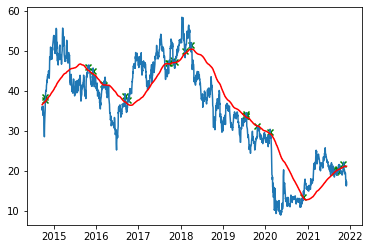

In [21]:
plt.plot(df_buy_signal["datadate"], df_buy_signal["prccd"])
plt.plot(df_buy_signal["datadate"], df_buy_signal["moving_average_200"], color="red")
plt.scatter(df_buy_signal["datadate"], df_buy_signal["signal"], color="green", marker="x")
plt.show()

# Bollinger Bands

Source: https://www.learnpythonwithrune.org/pandas-calculate-and-plot-the-bollinger-bands-for-a-stock/

In [22]:
df_bb = df_aag[["datadate", "prcod", "prccd", "prchd", "prcld"]].dropna().reset_index()

In [23]:
interval = 200
df_bb
df_bb['TP'] = (df_bb['prccd'] + df_bb['prcld'] + df_bb['prchd'])/3
df_bb['std'] = df_bb['TP'].rolling(interval).std(ddof=0)
df_bb['MA-TP'] = df_bb['TP'].rolling(interval).mean()
df_bb['BOLU'] = df_bb['MA-TP'] + 2*df_bb['std']
df_bb['BOLD'] = df_bb['MA-TP'] - 2*df_bb['std']
df_bb.dropna(inplace=True)

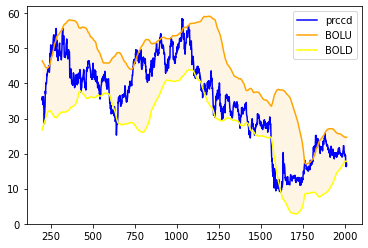

In [24]:
ax = df_bb[['prccd', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(df_bb.index, df_bb['BOLD'], df_bb['BOLU'], facecolor='orange', alpha=0.1)
plt.show()
# TODO: Index anpassen ist bisher nur ein Integer, Datetime wäre besser

# Calculating Returns

In [25]:
def net_return(df, ticker, date_buy, date_sell):
    
    course = "prco"
    
    price_buy = df_sp[(df_sp["tic"] == ticker) & (df_sp["datadate"] == date_buy)]["prcod"].values[0]
    
    price_sell = df_sp[(df_sp["tic"] == ticker) & (df_sp["datadate"] == date_sell)]["prcod"].values[0]
    
    return price_sell - price_buy

In [26]:
df_sp[(df_sp["tic"] == "AAL") & (df_sp["datadate"] == "2021-11-30")]["prcod"].values[0]

17.44

In [27]:
net_return(df_sp, "AAL", "2021-11-15", "2021-11-30")

-2.9599999999999973

# Returns on given rulset

In [28]:
df_buy_signal

,index,datadate,prccd,moving_average_200,signal
0,1695,2014-09-24,36.12,36.611298,NaN
1,1696,2014-09-25,35.21,36.664348,NaN
2,1697,2014-09-26,35.93,36.719598,NaN
3,1698,2014-09-29,35.03,36.764798,NaN
4,1699,2014-09-30,35.48,36.814948,NaN
...,...,...,...,...,...
1808,3503,2021-11-29,17.74,21.236400,NaN
1809,3504,2021-11-30,17.69,21.235750,NaN
1810,3505,2021-12-01,16.28,21.227200,NaN
1811,3506,2021-12-02,17.42,21.225750,NaN


In [46]:
list = []

position = False

total_return = 0

for i in df_buy_signal.index:
    
    if i-1 in df_buy_signal.index:
        
        # Signal, when the price crosses the sma from below, i.e. the price was below the sma the day before and is now above the sma
        if ((df_buy_signal.iloc[i]["prccd"] > df_buy_signal.iloc[i]["moving_average_200"]) &
            (df_buy_signal.iloc[i-1]["prccd"] < df_buy_signal.iloc[i]["moving_average_200"]) &
            (position == False)):
            
            position = True
            
            price_buy = df_buy_signal.iloc[i]["prccd"]
            
        elif(position == True):
            
            net_return = df_buy_signal.iloc[i]["prccd"] - price_buy
            
            # Close position if it makes 10 % loss or profit
            if((net_return < -(0.1 * price_buy)) |
               (net_return > (0.1 * price_buy))):
                
                position = False
                
                total_return += net_return
                
        list.append(total_return)

list.append(total_return)

print(position)

False


In [63]:
print("Return using the 200 day moving average as indicator: " + str(list[len(list)-1]))

Return using the 200 day moving average as indicator: -7.750000000000007


In [65]:
print("Return using a buy and hold approach: " + str(df_buy_signal.iloc[len(df_buy_signal)-1]["prccd"] - df_buy_signal.iloc[0]["prccd"]))

Return using a buy and hold approach: -19.499999999999996


In [48]:
df_buy_signal["total_return"] = list

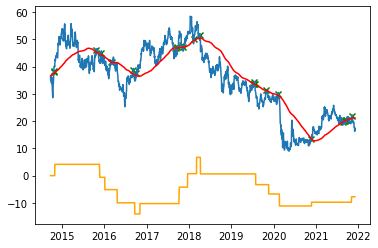

In [49]:
plt.plot(df_buy_signal["datadate"], df_buy_signal["prccd"])
plt.plot(df_buy_signal["datadate"], df_buy_signal["moving_average_200"], color="red")
plt.scatter(df_buy_signal["datadate"], df_buy_signal["signal"], color="green", marker="x")
plt.plot(df_buy_signal["datadate"], df_buy_signal["total_return"], color="orange")
plt.show()